- **Descrição:** Este conjunto de dados contém informações sobre programas de TV e filmes disponíveis na Netflix, incluindo detalhes como título, diretor, elenco, país de origem, data de lançamento, classificação, duração e descrição.

### Tarefas:

1. **Verificar Duplicatas:** Existe algum registro duplicado neste conjunto de dados? Se sim, remova os registros duplicados.
2. **Verificar Valores Nulos:** Existem valores nulos presentes em alguma coluna? Mostre com um mapa de calor.

### Perguntas:

1. **Para 'House of Cards':** Qual é o ID do show e quem é o diretor deste programa?
2. **Em que ano o maior número de filmes e séries foram lançados?** Mostre com um gráfico de barras.
3. **Quantos filmes e séries estão no conjunto de dados?** Mostre com um gráfico de barras.
4. **Mostre todos os filmes lançados em 2000.**
5. **Mostre apenas os títulos de todas as séries de TV lançadas apenas na Índia.**
6. **Mostre os 10 principais diretores, que deram o maior número de filmes e séries para a Netflix.**
7. **Mostre todos os registros, onde "Categoria é Filme e Tipo é Comédias" ou "País é Reino Unido".**
8. **Em quantos filmes/séries Tom Cruise atuou?**
9. **Quais são as diferentes classificações definidas pela Netflix?**
   - **Quantos filmes receberam a classificação 'TV-14' no Canadá?**
   - **Quantas séries de TV receberam a classificação 'R', após o ano de 2018?**
10. **Qual é a duração máxima de um filme/série na Netflix?**
11. **Qual país individual tem o maior número de séries de TV?**
12. **Como podemos ordenar o conjunto de dados por ano?**
13. **Encontre todas as instâncias onde: A categoria é 'Filme' e o tipo é 'Dramas' ou a categoria é 'Série de TV' e o tipo é 'TV Infantil'.**


# Obtenção dos Dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Dicionário das Variáveis

| Coluna       | Descrição                                                |
|--------------|----------------------------------------------------------|
| Show_Id      | Identificador único de cada show na Netflix.            |
| Category     | Categoria do show (por exemplo, filme, série de TV, etc.)|
| Title        | Título do show.                                          |
| Director     | Diretor do show (se aplicável).                          |
| Cast         | Elenco do show.                                          |
| Country      | País de origem do show.                                  |
| Release_Date | Data de lançamento do show na Netflix.                   |
| Rating       | Classificação etária do show.                            |
| Duration     | Duração do show (por exemplo, número de temporadas para uma série de TV ou duração de um filme). |
| Type         | Tipo do show (por exemplo, se é um filme ou uma série de TV). |
| Description  | Descrição ou sinopse do show.                           |

In [5]:
# importar o arquivo clima.csv para um DataFrame
df=pd.read_csv("netflix.csv")

In [6]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Análise dos Dados



Qual a porcentagem de valores duplicados no dataset?

Aparentemente temos 2 valores duplicados de 7789 entradas, valor significativamente baixo


In [21]:
# Verifique entradas duplicadas
df_duplicated = df.copy()
# duplicatas = len(df_duplicated)-len(df_duplicated.drop_duplicates())

# porcentagem_ausentes = (df.duplicated().mean() * 100).sort_values(ascending=False)
duplicatas = len(df[df.duplicated()])
print(duplicatas)
print(len(df))


# print(df.loc[df.Show_Id == 's684'])

2
7789


Qual a porcentagem de valores ausentes no dataset?

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas

Porcentagem de valores ausentes por coluna:
Director        30.658621
Cast             9.218128
Country          6.509180
Release_Date     0.128386
Rating           0.089870
Show_Id          0.000000
Category         0.000000
Title            0.000000
Duration         0.000000
Type             0.000000
Description      0.000000
dtype: float64


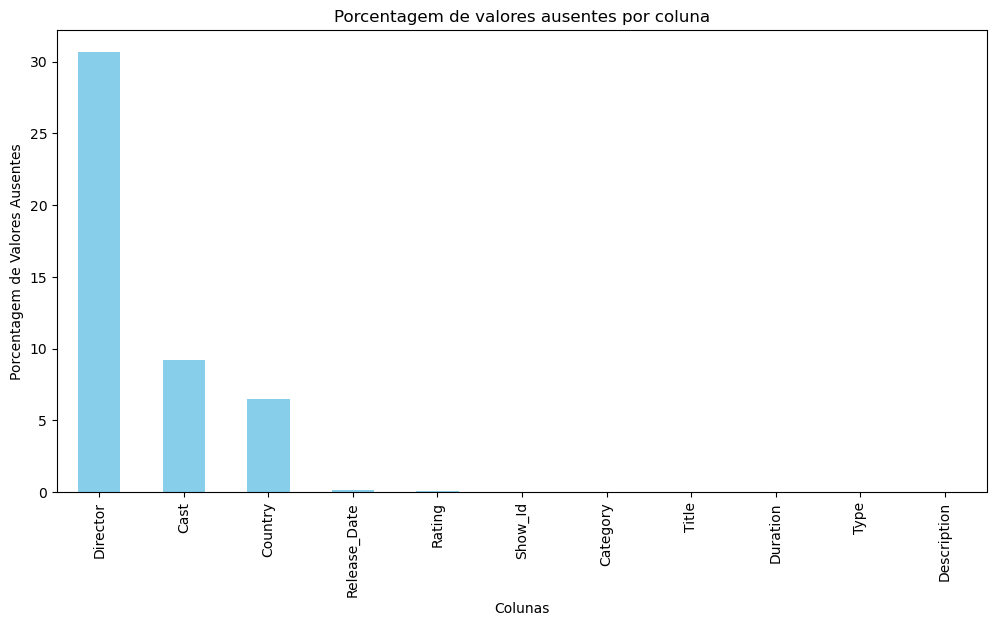

In [25]:
# Calcular a porcentagem de valores ausentes para cada variável
porcentagem_ausentes = (df.isnull().mean() * 100).sort_values(ascending=False)

# Mostrar a porcentagem de valores ausentes
print("Porcentagem de valores ausentes por coluna:")
print(porcentagem_ausentes)

# Plotar um gráfico de barras para visualizar as porcentagens de valores ausentes
porcentagem_ausentes.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Porcentagem de valores ausentes por coluna')
plt.xlabel('Colunas')
plt.ylabel('Porcentagem de Valores Ausentes')
plt.show()

# Perguntas

## 1 - Para 'House of Cards': Qual é o ID do show e quem é o diretor deste programa?
R: ID do show: s2833, Diretor: Robin Wright, David Fincher, Gerald McRaney, J...

In [28]:
hoc = df.loc[df.Title == "House of Cards"]
hoc

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


## 2 - Em que ano o maior número de filmes e séries foram lançados? Mostre com um gráfico de barras.
R: 2019 com 2154 lançamentos

#### Criando coluna `Ano`, visto que Release_Date veio em formato de string.

In [50]:
df['Ano'] = df['Release_Date'].apply(lambda x: x[-4:]if isinstance(x, str) else x)
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Ano
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


#### Groupby com numero de registros por ano

In [78]:
ano_maior_lancamento = df.groupby("Ano").size().sort_values().reset_index(name='Count')
ano_maior_lancamento

,Ano,Count
0,2010,1
1,2008,2
2,2009,2
3,2012,3
4,2013,11
5,2011,13
6,2014,25
7,2015,88
8,2021,117
9,2016,443


#### Gráfico de Barras

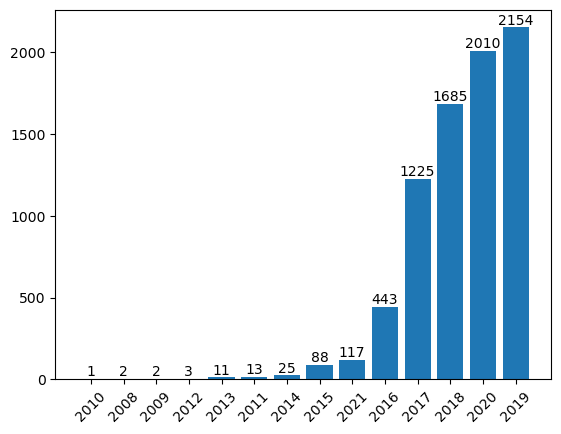

In [84]:
x = ano_maior_lancamento.Ano
y = ano_maior_lancamento.Count
plt.bar(x, y)


for i in range(len(x)):
    plt.annotate(str(y[i]), xy=(x[i], y[i]), ha='center', va='bottom')
    
plt.xticks(rotation=45)

plt.show()

## 3 - Quantos filmes e séries estão no conjunto de dados? Mostre com um gráfico de barras.
R: 5379 filmes e 2410 Séries

In [86]:
filmes_vs_series = df.groupby("Category").size().sort_values().reset_index(name='Count')
filmes_vs_series

,Category,Count
0,TV Show,2410
1,Movie,5379


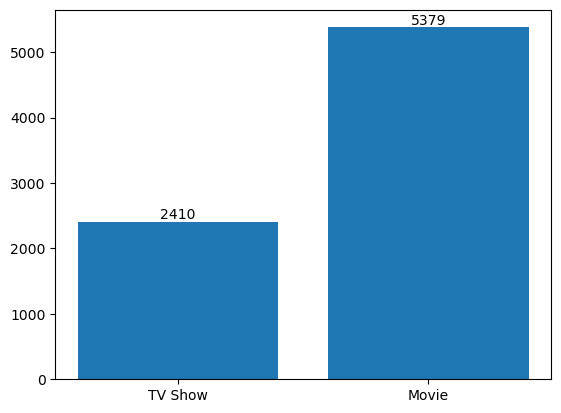

In [87]:
x = filmes_vs_series.Category
y = filmes_vs_series.Count

plt.bar(x, y)


for i in range(len(x)):
    plt.annotate(str(y[i]), xy=(x[i], y[i]), ha='center', va='bottom')
    

plt.show()

## 4 - Mostre todos os filmes lançados em 2000.
R: Não tivemos filmes lançados em 2000

In [88]:
df.loc[df['Ano'] == '2000']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Ano


## 5 - Mostre apenas os títulos de todas as séries de TV lançadas apenas na Índia.

In [97]:
india = df['Title'].loc[df['Country'] == 'India']
india

8                            706
9                           1920
18                        15-Aug
20          ​​Kuch Bheege Alfaaz
21                  ​Goli Soda 2
                  ...           
7766                        Zero
7771    Zindagi Na Milegi Dobara
7778                    Zokkomon
7782                         Zoo
7785                      Zubaan
Name: Title, Length: 923, dtype: object

## 6 - Mostre os 10 principais diretores que deram o maior número de filmes e séries para a Netflix.

In [107]:
director_count = df.groupby("Director").size().sort_values(ascending=False).reset_index(name='Count')
director_count.head(10)

,Director,Count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
5,Jay Chapman,12
6,Youssef Chahine,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Robert Rodriguez,8


## 7 - Mostre todos os registros, onde "Categoria é Filme e Tipo é Comédias" ou "País é Reino Unido".

In [118]:
df.loc[((df['Category'] == 'Movie') & (df['Type'].str.contains('Comedy'))) | (df['Country'].str.contains('United Kingdom'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Ano
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018
85,s86,TV Show,21 Again,NaN,Laura Morgan,United Kingdom,"July 1, 2020",TV-MA,1 Season,"British TV Shows, Reality TV","In a social experiment, a group of daughters s...",2020
93,s94,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,"May 1, 2018",TV-MA,70 min,Documentaries,Explore the circumstances surrounding the trag...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7740,s7739,TV Show,Young Wallander,NaN,"Adam Pålsson, Richard Dillane, Leanne Best, El...",United Kingdom,"September 3, 2020",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","An incendiary hate crime stirs civil unrest, f...",2020
7746,s7745,Movie,"Yours Sincerely, Kanan Gill",Neville Shah,Kanan Gill,India,"April 24, 2020",TV-MA,72 min,Stand-Up Comedy,Revisiting life goals set in a letter written ...,2020
7759,s7758,Movie,Zach Galifianakis: Live at the Purple Onion,Michael Blieden,"Zach Galifianakis, Brian Unger",United States,"February 26, 2019",TV-MA,61 min,Stand-Up Comedy,"The unorthodox, piano-playing stand-up star Za...",2019
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020


## 8 - Em quantos filmes/séries Tom Cruise atuou?

In [123]:
#Tratamento dos NA por string vazia 
df.Cast = df.Cast.fillna('')
#Busca por cast que contenha Tom Cruise
df.loc[df['Cast'].str.contains("Tom Cruise")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Ano
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019


## 9 - Quais são as diferentes classificações definidas pela Netflix?
### Quantos filmes receberam a classificação 'TV-14' no Canadá?
R: 1931
### Quantas séries de TV receberam a classificação 'R', após o ano de 2018?
R: 450

In [139]:
df.dropna(subset=['Ano'], inplace=True)
df.Ano = df.Ano.astype(int)
print(df['Show_Id'][df.Rating == 'TV-14'].count())
print(df['Show_Id'][(df.Rating == 'R') & (df.Ano > 2018)].count())


1928
450


## 10 - Qual é a duração máxima de um filme/série na Netflix?
R: A duração maxima de um filme é de 312 minutos  
R: A maior série tem 16 temporadas


In [162]:
# check unique names
df.Duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

### Filmes

In [181]:
# separando um df apenas de filmes pq série tem SEASON no texto, ainda não sei como tratar
only_movies = df.loc[df.Category == 'Movie']

# aparentemente temos um espaço e "min" após cada duração de filmes em minutos, fazemos o split no espaço e pegamos a posição 0
only_movies.Duration = only_movies.Duration.apply(lambda x: x.split(' ')[0])

# agora que só temos os numeros, transformamos em inteiro pro organização dos valores funcionar
only_movies.Duration = only_movies.Duration.astype(int)

# organiza os valores do menor pro maior e pega o final
only_movies.Duration.sort_values(ascending=False).head()


C:\Users\luizjr\AppData\Local\Temp\ipykernel_25556\2660212062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_movies.Duration = only_movies.Duration.apply(lambda x: x.split(' ')[0])
C:\Users\luizjr\AppData\Local\Temp\ipykernel_25556\2660212062.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_movies.Duration = only_movies.Duration.astype(int)


957     312
6852    253
4490    237
3694    233
5109    230
Name: Duration, dtype: int32

### Séries

In [182]:
only_series = df.loc[df.Category == 'TV Show']
only_series.Duration = only_series.Duration.apply(lambda x: x.split(' ')[0])
only_series.Duration = only_series.Duration.astype(int)

only_series.Duration.sort_values(ascending=False).head()

C:\Users\luizjr\AppData\Local\Temp\ipykernel_25556\1459894820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_series.Duration = only_series.Duration.apply(lambda x: x.split(' ')[0])
C:\Users\luizjr\AppData\Local\Temp\ipykernel_25556\1459894820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_series.Duration = only_series.Duration.astype(int)


2538    16
5913    15
4438    15
1471    13
1537    12
Name: Duration, dtype: int32

## 11 - Qual país individual tem o maior número de séries de TV?
R: United States

In [180]:
df.groupby("Country").size().sort_values(ascending=False).head()


Country
United States     2550
India              923
United Kingdom     396
Japan              225
South Korea        183
dtype: int64

## 12 - Como podemos ordenar o conjunto de dados por ano?


In [187]:
df.sort_values('Ano', ascending=True)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Ano
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008
1765,s1766,TV Show,Dinner for Five,NaN,,United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010
...,...,...,...,...,...,...,...,...,...,...,...,...
692,s693,Movie,Bad Grandpa .5,Jeff Tremaine,"Johnny Knoxville, Jackson Nicoll, Greg Harris,...",United States,"January 1, 2021",TV-MA,87 min,Comedies,The geriatric antics of Irving Zisman continue...,2021
2413,s2414,Movie,Gimme Shelter,Ron Krauss,"Vanessa Hudgens, James Earl Jones, Rosario Daw...",United States,"January 1, 2021",PG-13,101 min,"Dramas, Independent Movies","After running away from her abusive mother, a ...",2021
5521,s5521,Movie,Sex and the City 2,Michael Patrick King,"Sarah Jessica Parker, Kim Cattrall, Cynthia Ni...",United States,"January 1, 2021",R,146 min,"Comedies, Dramas, Romantic Movies","Best friends Carrie, Miranda, Samantha and Cha...",2021
7553,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",2021


## 13 - Encontre todas as instâncias onde: A categoria é 'Filme' e o tipo é 'Dramas' ou a categoria é 'Série de TV' e o tipo é 'TV Infantil'.

In [194]:
df.loc[((df['Category'] == "Movie") & (df['Type'].str.contains("Drama"))) | ((df['Category'] == "TV Show") & (df['Type'].str.contains("Kids")))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Ano
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018
7779,s7778,TV Show,Zombie Dumb,NaN,,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
